# Introduction to Deep Learning
## [DataCamp Course Dashboard](https://www.datacamp.com/courses/deep-learning-in-python)

### Imagine you work for a bank
- You need to predict how many transactions each customer will make next year
- You have features like `age`, `bank_balance`, `retirement_status`, etc.

#### How would a linear regression model work through this problem?
- The LR model would look at the influence of each feature individually and not the interactions between the features. This is not ideal from an intutive standpoint.

# Interactions
- Neural networks account for interactions really well
- Deep learning uses especially powerful neural networks

# Course structure
- First two chapters focus on conceptual knowledge
    - Debug and tune deep learning models on conventional prediction problems
    - Lay the foundation for progressing towards modern applications
    
## Build deep learning models with keras
```python
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
predictors = np.loadtxt('predictors_data.csv', delimiter=',')
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
```

## Deep learning models capture interactions
- We generate a function that describes the interaction of variables and use that function to predict the outcome of the response variable.
- The input layer describes our predictive features (`age`, `bank_balance`, `retirement_status`, etc)
- The output layer describes our response variable or what we want to predict.
- All other layers are called the hidden layers because these are non-empirical values that are calculated by the model to account for the interaction between variables in the input layer and more accurately predict the output layer.

# Forward propagation
- First step of the **forward propagation algorithm** is to draw lines between the input layer and the nodes of the hidden layer.
- Each line is given a weight to account for the strength of that interaction.
- Next, each input layer value is multiplied by its line weight and added to all other input layer calculations corresponding to that node.
- This process to repeated to draw lines, assign weights, and apply calculations to yeild the output layer value.

    - Multiply - add process
    - Dot product
    - Forward propagation for one data point at a time
    - Output is the prediction for that data point

In [1]:
# Forward propagation code

import numpy as np
input_data = np.array([2, 3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])
print('hidden layer values: ', hidden_layer_values)

output = (hidden_layer_values * weights['output']).sum()
print('output value: ', output)

hidden layer values:  [5 1]
output value:  9


In [3]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


# Activation functions

- These functions allow the model to capture nonlinearities.
- Applied to node inputs to produce node output
- `tanh()` was a very popular activation function
- Today, ReLU (Rectified Linear Activation) is the industry standard activation function
$$RELU(x) = \left\{\begin{matrix}
0 \text{ if } x<0\\ 
x \text{ if } x\geq 0
\end{matrix}\right.$$

In [5]:
# Activation function code

import numpy as np
input_data = np.array([-1, 2])
weights = {'node_0': np.array([3, 3]),
          'node_1': np.array([1, 5]),
          'output': np.array([2, -1])}
node_0_input = (input_data * weights['node_0']).sum()

node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()

node_1_output = np.tanh(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])
print('hidden layer outputs: ', hidden_layer_outputs)

output = (hidden_layer_outputs * weights['output']).sum()
print('output value: ', output)

hidden layer outputs:  [0.99505475 0.99999997]
output value:  0.9901095378334199


The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

In [13]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print('output layer value:', model_output, '\nWithout the activation function, \
this prediction would be negative.')

output layer value: 52 
Without the activation function, this prediction would be negative.


In [14]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


# Deeper networks
## Multiple hidden layers
## Representation learning
- Deep networks internally build representations of patterns in the data.
- Partially replace the need for feature engineering
- Subsequent layers build increasingly sophisticated representations of raw data

# Deep learning
- Modeler doesn't need to specify the interactions
- When you train the model, the neural network gets weights that find the relevant patterns to make better predictions

*Identity function* - each node's output will be the same as its input.

In [23]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print('The output value is:', output)

The output value is: 182


# The need for optimization
## Loss function
- Aggregates errors in predictions from many data points into single number
- Measure of model's predictive performance
- Mean Squared Error loss function
- Goal: Find the weights that give the lowest value of the loss function
- Gradient descent is the method

In [27]:
def predict_with_network_weights(input_data_point, weights):
    '''Takes input data and a dictionary of weights and
    returns the neural network output layer value.
    '''
    
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_values = np.array([node_0_output, node_1_output])
    
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    
    model_output = relu(input_to_final_layer)
    
    return(model_output)

To pull this code from DataCamp, I imported the `inspect` package and used the `getsource()` function passing in `predict_with_network`.

In [28]:
import inspect
inspect.getsource(predict_with_network_weights)

"def predict_with_network_weights(input_data_point, weights):\n    '''Takes input data and a dictionary of weights and\n    returns the neural network output layer value.\n    '''\n    \n    node_0_input = (input_data_point * weights['node_0']).sum()\n    node_0_output = relu(node_0_input)\n    \n    node_1_input = (input_data_point * weights['node_1']).sum()\n    node_1_output = relu(node_1_input)\n    \n    hidden_layer_values = np.array([node_0_output, node_1_output])\n    \n    input_to_final_layer = (hidden_layer_values * weights['output']).sum()\n    \n    model_output = relu(input_to_final_layer)\n    \n    return(model_output)\n"

In [25]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network_weights(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network_weights(input_data, weights_1)

# Calculate error: error_1
error_1 = target_actual - model_output_1

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [29]:
input_data = [np.array([0, 3]), 
              np.array([1, 2]), 
              np.array([-1, -2]), 
              np.array([4, 0])]
weights_0 = {'node_0': np.array([2, 1]), 
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}
target_actuals = [1, 3, 5, 7]

In [33]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in tqdm(input_data):
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network_weights(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network_weights(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

100%|██████████| 4/4 [00:00<00:00, 3683.25it/s]

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


# Gradient Descent
- If the slope is positive:
    - Going opposite the slope means moving to lower numbers
    - Subtract the slope from the current value
    - Too big a step might lead us astray
- Solution: learning rate
    - Update each weight by subtracting **learning rate \* slope** (learning rates are usually around 0.01)
    
# Slope calculation example
- To calculate the slope for a weight, need to multiply:
    - Slope of the loss function with respect to (w.r.t.) value at the node we feed into
        - Slope of mean-squared loss function w.r.t. prediction
        - 2 \* (Predicted Value - Actual Value) = 2 \* Error
    - The value of the node that feeds into our weight
    - Slope of the activation function w.r.t. value we feed into

In [34]:
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

5


In [35]:
gradient = 2 * input_data * error

gradient

array([30, 40])

In [37]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


In [39]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


In [41]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print('original weighted error:', error)

# Print the updated error
print('mse updated error:', error_updated)

original weighted error: 7
mse updated error: 5.04


In [45]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

In [46]:
import matplotlib.pyplot as plt

100%|██████████| 20/20 [00:00<00:00, 8658.76it/s]


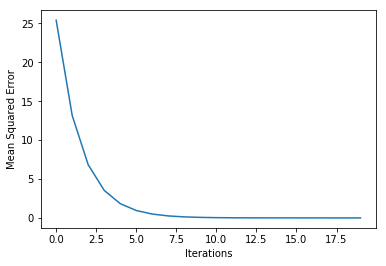

In [47]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in tqdm(range(n_updates)):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Backpropagation

- Calculate slopes in more complex models
- Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
- Comes from chain rule of calculus
- Important to understand the process, but you will generally use a library that implements this

# Process
- Trying to estimate the slope of the loss function w.r.t. each weight
- Do forward propagation to calculate predictions and errors
    - Go back one layer at a time
    - Gradients for weight is product of:
        1. Node value feeding into that weight
        2. Slope of loss function w.r.t. node it feeds into
        3. Slope of activation function at the node it feeds into
    
- Need to also keep track of the slpes of the loss function w.r.t. node values
- Slope of node values are the sum of the slopes for all weights that come out of them

- Each time you generate predictions using forward propagation, you update the weights using backward propagation.

# Calculating slopes associated with any weight
- Gradient for weight is product of:
    1. Node value feeding into that weight
    2. Slope of activation function for the node being fed into
    3. Slope of loss function w.r.t. output node
    
# Recap
- Start at some random set of weights
- Use forward propagation to make a prediction
- Use backward propagation to calculate the slope of the loss function w.r.t. each weight
- Multiply that slope by the learning rate, and subtract from the current weights
- Keep going with that cycle until we get to a flat part

# Stochastic gradient descent
- It is common to calculate slopes on only a subset of the data ('batch')
- Use a different batch of data to calculate the next update
- Start over from the beginning once all data is used
- Each time through the training data is called an epoch
- When slopes are calculated on one batch at a time:
    - stochastic gradient descent
    
# Creating a keras model
## Model building steps
- Specify Architecture
- Compile
- Fit
- Predict

```python
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

predictors = np.loadtxt('predictors_data.csv',
                        delimiter=',')
n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', 
                input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
```

In [54]:
predictors = np.loadtxt('hourly_wages.csv', delimiter=',', skiprows=1, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9))

In [55]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

# Compiling and fitting a model
- Specify the optimizer
    - Controls the learning rate
    - Many options and mathematically comples
    - "Adam" is usually a good choice
- Loss function
    - "mean_squared_error" common for regression
```python
model.compile(optimizer='adam', loss='mean_squared_error')
```

# Fitting a model
- Applying backpropagation and gradient descent with your data to update the weights
- Scaling data before fitting can ease optimization

```python
model.fit(predictors, target)
```

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [57]:
target = np.loadtxt('hourly_wages.csv', delimiter=',', skiprows=1, usecols=(0))

In [58]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

Epoch 1/1
534/534 [==============================] - 0s 693us/step - loss: 142.1494


# Classification
- 'categarical_crossentropy' loss function
- Similar to log loss: Lower is better
- Add metrics = `['accuracy']` to compile step for easy-to-understand diagnostics
- Output layer has separate node for each possible outcome and uses `softmax` activation

```python
from keras.utils import to_categorical
data = pd.read_csv('basketball_shot_log.csv')
predictors = data.drop(['shot_results']), axis=1).as_matrix()
target = to_categorical(data.shot_result)

model = Sequential()
model.add(Dense(100, activation='relu', 
                input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target)
```

In [59]:
import pandas as pd

In [68]:
df = pd.read_csv('titanic_all_numeric.csv')
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [70]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
predictors = df.drop('survived', axis=1).values
target = to_categorical(df.survived)

n_cols = predictors.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', 
                input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Epoch 1/1
891/891 [==============================] - 0s 401us/step - loss: 3.3760 - acc: 0.6117
